In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_V2.csv')
test_data = pd.read_csv('test_V2.csv')

In [3]:
print("Memory used by Training Data: {}MB  and Test Data: {}MB".format(round(train_data.memory_usage().sum()/1024**2,3),round(test_data.memory_usage().sum()/1024**2,3)))

Memory used by Training Data: 983.902MB  and Test Data: 413.184MB


## Removing any nulls and potential outliers

In [4]:
# looking for nulls in training data
train_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
# looking for nulls in testing data
test_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [6]:
# Removing null rows in training data
train_data.dropna(axis=0,how='any',inplace=True)

In [7]:
# Creating new feature "totalDistance"
train_data['totalDistance'] = train_data['rideDistance'] + train_data['walkDistance'] + train_data['swimDistance']

In [8]:
# Creating new feature "headshot_rate"
train_data['headshot_rate'] = train_data['headshotKills']/train_data['kills']
train_data['headshot_rate'] = train_data['headshot_rate'].fillna(0)

#### Finding outliers for fraudsters

In [9]:
# Players who made more than 10 kills and all the kills were done by headshot

train_data[(train_data['headshot_rate'] == 1) & (train_data['kills'] >= 10)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.0,0,0,2939.0,5,0,0.8462,2939.00,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0,0.0,0,0,3422.0,8,1560,1.0000,8142.00,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0,0.0,0,0,2105.0,5,1587,1.0000,2105.00,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0,0.0,2,0,2761.0,7,1519,0.9630,7948.00,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0,0.0,0,0,2458.0,4,1562,1.0000,3476.00,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,0.0,0,0,2932.0,4,0,1.0000,8178.00,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0,0.0,0,0,2450.0,7,1468,1.0000,2858.90,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,0,0.0,0,0,3915.0,5,0,1.0000,5963.00,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0,0.0,0,0,3108.0,7,1500,1.0000,3108.00,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0,140.8,0,0,2339.0,4,0,1.0000,2479.80,1.0


In [10]:
# Players who has more that 40 kills, picking more 55 weapons and covered distance lesser than 100 meters

train_data[(train_data['kills'] >= 40) & (train_data['weaponsAcquired'] > 55) & (train_data['totalDistance'] < 100.0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0.0,0,0,23.71,61,0,0.7000,23.71,0.250000
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,0,0.0,0,0,24.27,56,0,1.0000,24.27,0.087719
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,0,0.0,0,0,85.55,66,0,1.0000,85.55,0.127273
1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,...,0,0.0,0,0,46.71,72,0,0.7778,46.71,0.121951


In [11]:
# Players who has more than 40 kills without using any heals

train_data[(train_data['kills'] >= 40) & (train_data['heals'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0,0.0,1,0,718.3,16,1500,1.0,718.3,0.952381
2105633,770c02791306c4,48ca6706a90e10,6ee2c835176181,8,0,4272.0,40,34,0,1,...,0,0.0,0,0,80.4,21,0,1.0,80.4,0.790698
2316123,dbc81aa64a7e3d,c50fe5c54e8bb6,5d58307bae9b50,8,0,4106.0,31,3,0,1,...,0,0.0,0,0,1282.0,22,0,1.0,1282.0,0.075000
2601666,436d1530e9eb00,5c974c2bb9d9f0,fe7043ee6221c8,5,0,4347.0,0,31,0,1,...,0,0.0,0,0,134.3,36,0,1.0,134.3,0.584906
3924729,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,1,...,0,0.0,0,0,1180.0,2,1500,1.0,1180.0,0.875000


In [12]:
# Players who has kills without any moving
train_data[(train_data['kills'] > 0) & (train_data['totalDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000,0,0,3,18,...,0,0.0,0,0,0.0,8,0,0.8571,0.0,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600,0,0,6,33,...,0,0.0,0,0,0.0,22,0,0.6000,0.0,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000,0,4,5,3,...,0,0.0,0,0,0.0,13,0,0.8947,0.0,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800,0,0,0,69,...,0,0.0,0,0,0.0,7,1500,0.0000,0.0,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000,0,1,0,37,...,0,0.0,0,0,0.0,10,0,0.3000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440232,1f3a6d69d22c7e,60b2849191c539,ff9cd80c0d8fb7,0,0,4.316,0,0,0,61,...,0,0.0,0,0,0.0,7,1500,0.8889,0.0,0.000000
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.830,0,0,4,42,...,0,0.0,0,0,0.0,8,0,0.0000,0.0,0.000000
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.100,7,2,16,26,...,0,0.0,0,0,0.0,7,1500,0.6000,0.0,0.333333
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.400,9,2,0,18,...,0,0.0,1,0,0.0,16,1500,0.9000,0.0,0.222222


In [13]:
# Players who has kills from distance 1000 m 
train_data[(train_data['kills'] > 0) & (train_data['longestKill'] >= 1000)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0,0.00,0,1,3052.00,9,0,0.9231,3775.20,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0,0.00,0,0,48.87,38,1500,0.5385,48.87,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0,0.00,0,0,1264.00,26,0,1.0000,2981.00,0.000000
523088,1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,...,0,0.00,0,0,0.00,3,0,0.7143,0.00,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0,0.00,0,0,29.21,30,1500,0.6000,29.21,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0,0.00,0,0,1074.00,22,0,0.0000,3159.00,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0,0.00,0,0,569.50,18,0,0.9091,569.50,0.500000
996713,f4082eee4c45e9,4d02ce950f74fc,838cb9a3c94598,1,0,916.4,0,0,0,17,...,0,0.00,4,0,0.00,15,0,1.0000,0.00,0.000000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0,0.00,0,0,832.50,9,1500,0.2857,832.50,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0,0.00,0,0,2848.00,4,1500,0.9412,2848.00,0.466667


In [14]:
# Players who got more than 10 roadKills
train_data[train_data['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,14,5.297,0,0,1277.0,0,1371,0.4286,1282.302,0.000000
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,11,0.000,0,0,816.6,5,1533,0.4713,4934.600,0.000000
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,18,0.000,0,0,3150.0,4,1568,1.0000,5876.000,0.050000
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,11,0.000,0,0,1041.0,10,1606,0.9398,7853.000,0.277778


#### Removing above fraudsters

In [15]:
# Removing Players who made more than 10 kills and all the kills were done by headshot
train_data.drop(train_data[(train_data['headshot_rate'] == 1) & (train_data['kills'] >= 10)].index,inplace=True)
# Removing Players who has more that 40 kills, picking more 55 weapons and covered distance lesser than 100 meters
train_data.drop(train_data[(train_data['kills'] >= 40) & (train_data['weaponsAcquired'] > 55) & (train_data['totalDistance'] < 100.0)].index,inplace=True)
# Removing Players who has more than 40 kills without using any heals
train_data.drop(train_data[(train_data['kills'] >= 40) & (train_data['heals'] == 0)].index,inplace=True)
# Removing Players who has kills without using any moving
train_data.drop(train_data[(train_data['kills'] > 0) & (train_data['totalDistance'] == 0)].index,inplace=True)
# Removing Players who has kills from distance 1000 m 
train_data.drop(train_data[(train_data['kills'] > 0) & (train_data['longestKill'] >= 1000)].index,inplace=True)
# Removing Players who got more than 10 roadKills
train_data.drop(train_data[train_data['roadKills'] > 10].index,inplace=True)

#### Finding outliers in travelling (walking, riding and swimming)

In [16]:
# Whole Map is of 8x8 km 
# Player who roam by walking around without any kill
train_data[(train_data['walkDistance'] >= 13000) & (train_data['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0,9.882,0,0,13530.0,7,0,0.8163,13540.3032,0.0
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.00,0,0,0,46,...,0,381.900,0,0,25780.0,0,0,0.9894,26161.9078,0.0
1072113,692e7657b6e340,10baa5ce3cdffe,ad7403ad4d20a9,0,1,0.00,0,0,5,50,...,0,15.270,1,0,13040.0,4,0,0.6786,13055.2898,0.0
1137979,3c23cf6c61171f,90b6aaaa2a16b7,a52c5ac7c18311,0,2,0.00,0,0,27,41,...,0,80.340,0,0,13160.0,3,0,0.9643,13240.3948,0.0
1188935,2dd8f83eb3bd7f,d1e7809ff69bb4,c8585bc8a88aa6,0,0,0.00,0,0,0,44,...,0,180.700,0,0,13360.0,4,0,0.9643,14798.7000,0.0
1797162,7b9a750b17e9c6,2d00192e4029c5,6fe77402ddb0e1,0,0,0.00,0,0,0,55,...,0,129.400,0,0,16250.0,3,0,0.6000,16379.4401,0.0
2078996,1284474083cc33,fa7e10443cc7df,c62835e88e61a6,0,2,0.00,0,0,3,48,...,0,256.900,0,0,14250.0,8,0,0.8000,15354.6000,0.0
2238900,861d1e5a63f3e6,1da6a90addf96d,16f2c51578f323,0,1,0.00,0,0,5,46,...,0,389.500,0,0,15370.0,7,0,0.8125,15759.5111,0.0
2990339,fc3fdd39dcd266,f901321bc27871,c0ebfb404aaa47,0,4,75.35,0,0,0,40,...,0,42.190,0,0,13070.0,4,0,0.9286,14902.1900,0.0
3318429,25a548c95fa48f,978df298b094ba,99407bcde7569c,0,0,0.00,0,0,2,39,...,0,38.440,0,0,13660.0,1,0,0.8913,13698.4539,0.0


In [17]:
# Players who raom around by riding without any kill

train_data[(train_data['rideDistance'] >= 30000) & (train_data['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.000,0,0,2,43,...,0,0.0,0,0,402.10,3,1449,0.8171,32362.10,0.0
605623,8dee54600c67ca,e77f3e175b5959,26bc606cdae6bf,0,0,11.210,0,0,0,27,...,0,0.0,0,0,1641.00,0,1498,0.6800,35611.00,0.0
1232362,4bf27787223351,b0140dd17f3238,5ed9c405f7e71d,0,1,0.000,0,0,10,47,...,0,0.0,1,0,1473.00,3,0,0.7979,32483.00,0.0
1725337,9f14f77b6dd9b6,8a2a8ae2506323,904b5fa7f59bc5,0,2,2.389,0,0,5,19,...,0,0.0,0,0,542.10,2,1565,0.6944,38212.10,0.0
2137063,73b793b4e7523f,f4444641af7e5c,6385f7641268c3,0,0,0.000,0,0,0,52,...,0,0.0,0,0,28.76,0,0,0.7204,31398.76,0.0
2700691,3428324a089608,fa77b4ac736dbf,9b1c87f4016f47,0,1,31.270,0,0,0,46,...,0,0.0,0,0,174.10,1,1530,0.8557,31464.10,0.0
2927408,260efc0cf6b36c,b112f8d21e8185,3e977510ce1d3c,0,0,11.220,0,0,0,44,...,0,0.0,0,0,426.60,2,1619,0.8132,31086.60,0.0
3404578,8e84f4228e5436,c5ca5892142cbd,56775920f704e8,0,0,3.298,0,0,0,40,...,0,0.0,0,0,233.70,5,1497,0.9175,32553.70,0.0
3567265,99f342c6022411,9158efebffecc7,ddbe41fe165c7f,2,2,113.200,0,0,3,34,...,0,0.0,0,0,616.20,4,0,1.0000,31636.20,0.0
4099938,afe34618b04d77,c14f532b283844,732c3b752e055f,0,0,0.000,0,0,0,42,...,0,0.0,0,0,560.10,0,0,0.8478,41270.10,0.0


In [18]:
# Players who is able to ride and kill without walking even a single meter
train_data[(train_data['kills'] >= 0) & (train_data['rideDistance'] > 0) & (train_data['walkDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
33144,0e2312e4d5cc1f,2c538cd627c273,9c169b35430d3a,0,0,0.000,0,0,0,85,...,0,0.0,0,0,0.0,0,0,0.1224,1938.000,0.0
56769,e6a15772d2ddd7,af5498428f3b2f,6f98e217a2290d,0,0,0.000,0,0,0,84,...,0,0.0,0,0,0.0,0,0,0.0357,636.100,0.0
67805,b349fbe39d2bf9,55a5f98bba40f2,8618bab7a53a8f,0,0,0.000,0,0,0,84,...,0,0.0,1,0,0.0,0,0,0.1633,1936.000,0.0
93193,893d0d4001f746,bceb74389d076f,467a00103bab0e,0,0,0.000,0,0,0,76,...,0,0.0,0,0,0.0,0,0,0.2316,5528.000,0.0
100109,c53f8ee39c4af8,57391b3c85e626,d645de11ebdc2b,0,0,0.000,0,0,0,85,...,0,0.0,0,0,0.0,0,1500,0.0208,821.900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328180,ed1aad989fbb93,9e956ca6359d38,f25bc3a299e309,0,0,0.000,0,0,0,87,...,0,0.0,0,0,0.0,0,1569,0.0714,1959.000,0.0
4357193,71116df0366fbd,f4d15edbdba3a5,88207f09bdcdf1,0,0,0.000,0,0,0,83,...,0,0.0,0,0,0.0,0,0,0.0690,898.800,0.0
4370381,2da95f846d9715,2bc0d75baf88c2,a0720f552baccb,0,0,0.000,0,0,0,88,...,0,0.0,0,0,0.0,0,0,0.0000,8.789,0.0
4385733,f7ffb45c188729,1b6fea0727cc01,e9803725254392,0,0,5.753,0,0,0,90,...,0,0.0,0,0,0.0,0,1596,0.0370,717.800,0.0


In [19]:
# Players whose total distance is 0
train_data[(train_data['totalDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0,0.0,0,0,0.0,0,0,0.0000,0.0,0.0
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0,0.0,0,0,0.0,0,847,0.0000,0.0,0.0
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0,0.0,0,0,0.0,0,765,0.0000,0.0,0.0
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0,0.0,0,0,0.0,0,1510,0.0000,0.0,0.0
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0,0.0,0,0,0.0,0,0,0.1277,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,...,0,0.0,0,0,0.0,0,0,0.0000,0.0,0.0
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,...,0,0.0,0,0,0.0,0,1363,0.0412,0.0,0.0
4446905,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,...,0,0.0,0,0,0.0,1,0,0.0417,0.0,0.0
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,...,0,0.0,0,0,0.0,0,916,0.0000,0.0,0.0


In [20]:
# Players who swim for more than 2 km without breathing
train_data[train_data['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,0,2295.0,0,0,1002.000,4,1466,0.9592,3297.000,0.000000
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,0,2148.0,0,0,2276.000,5,0,0.9600,10113.000,0.000000
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,0,2718.0,0,0,4691.000,5,1516,1.0000,10740.000,1.000000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,0,2668.0,0,0,415.100,10,1499,1.0000,3083.100,0.200000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,0,3823.0,0,0,995.300,9,0,1.0000,4818.300,0.500000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,0,2484.0,0,0,1966.000,3,0,0.5833,5314.000,0.000000
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,0,3514.0,0,0,4296.000,8,1492,0.8511,9899.000,0.000000
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,0,2387.0,0,0,7.546,6,0,1.0000,2394.546,0.000000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,0,2206.0,0,0,4687.000,4,0,0.9600,9926.000,0.714286
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,0,2338.0,0,0,1750.000,0,1518,0.2143,4088.000,0.000000


#### Removing anomalies for walking, Riding and Swimming

In [21]:
# Removing players who roam by walking around without any kill
train_data.drop(train_data[(train_data['walkDistance'] >= 13000) & (train_data['kills'] == 0)].index,inplace=True)
# Removing players who raom around by riding without any kill
train_data.drop(train_data[(train_data['rideDistance'] >= 30000) & (train_data['kills'] == 0)].index,inplace=True)
# Removing players who is able to ride and kill without walking even a single meter
train_data.drop(train_data[(train_data['kills'] >= 0) & (train_data['rideDistance'] > 0) & (train_data['walkDistance'] == 0)].index,inplace=True)
# Removing players whose total distance is 0
train_data.drop(train_data[(train_data['totalDistance'] == 0)].index,inplace=True)
# Removing players who swim for more than 2 km without breathing
train_data.drop(train_data[train_data['swimDistance'] >= 2000].index,inplace=True)

#### Finding anomalies Anomalies in Weapons Acquired and heals used

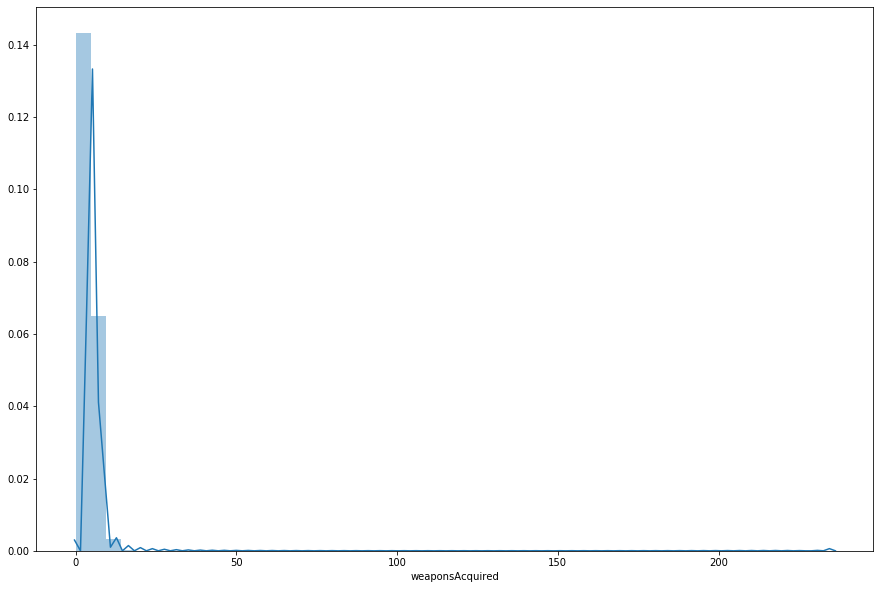

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['weaponsAcquired'])

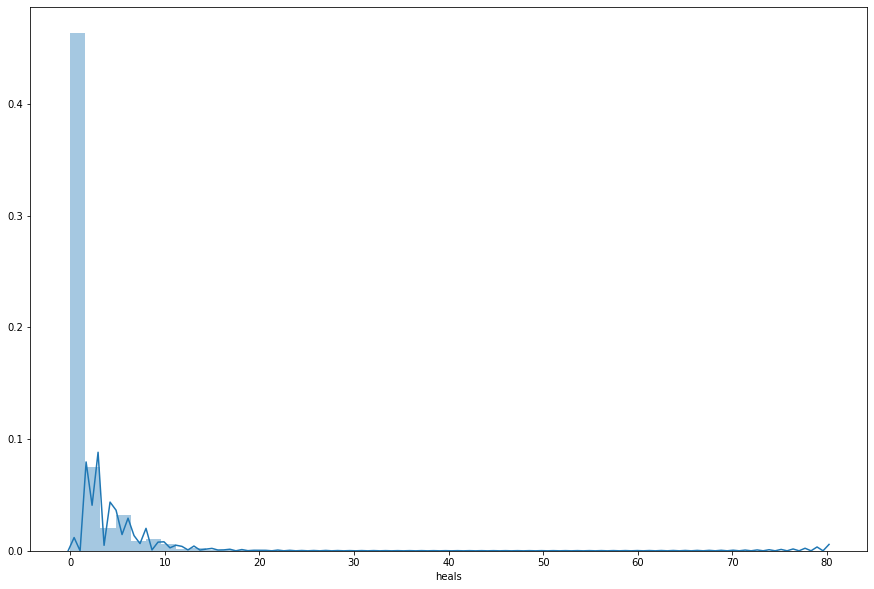

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['heals'])

In [24]:
train_data[train_data['weaponsAcquired']>80]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0,0.00,0,0,1307.0,128,1577,0.7111,3187.00,0.000000
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0,47.21,0,0,2400.0,102,0,0.8929,5299.21,0.000000
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0,0.00,0,0,653.1,95,0,0.5600,653.10,0.000000
1462706,be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.00,0,8,4,3,...,0,0.00,0,0,1128.0,83,0,0.8000,2082.40,0.150943
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0,0.00,0,0,980.8,94,0,0.2000,2888.80,0.130435
1834515,e927e9020f7e0d,60d6b714a7308f,8e265af296007b,1,1,26.46,0,0,1,51,...,0,0.00,0,0,2835.0,96,0,0.9200,2835.00,0.000000
2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,11,...,0,0.00,0,0,275.9,96,0,0.0000,275.90,0.062500
2442962,438cabaa5dfbdd,596c155c524725,8e0bbeec19a929,0,0,0.00,0,0,0,56,...,0,0.00,0,0,807.6,95,0,0.5000,807.60,0.000000
2743408,afcb46681b909f,3715298b7eea9c,4dd4d42772464f,0,4,186.90,2,0,2,18,...,0,0.00,1,0,1643.0,167,1452,0.7955,3318.00,0.000000
2749693,940b52bf12805a,4757d102ca4fbf,7ecae2cedc064f,1,3,378.90,2,0,5,7,...,0,0.00,0,0,3338.0,177,1711,0.8846,3641.70,0.000000


In [25]:
train_data[train_data['heals']>40]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.00,0,0,47,43,...,0,0.000,0,0,1387.0,6,0,0.9368,6854.000,0.0
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.00,0,1,43,21,...,0,292.400,0,0,2791.0,7,0,0.9615,3083.400,1.0
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.00,0,0,52,49,...,0,3.443,0,0,1340.0,3,1543,0.8333,1343.443,0.0
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.00,0,0,42,45,...,0,0.000,0,0,1510.0,6,0,0.8646,7444.000,0.0
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.00,0,0,48,43,...,0,0.000,0,0,1968.0,9,0,0.8370,5816.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214691,7e6bcd444b9120,507f2dfb218d46,6d18496b360cd6,0,8,0.00,0,0,47,46,...,0,0.000,0,0,2407.0,7,1571,0.8632,6446.000,0.0
4262662,3be1ded892f443,5c6c4e66418c25,ce09de37cf3f5a,0,1,230.00,5,0,80,41,...,0,0.000,0,0,932.7,4,1527,0.7600,4299.700,0.0
4280055,e73cf7c276c146,ca8a9b47196ec8,fe41b535502d7c,0,7,100.00,0,1,45,26,...,0,0.000,0,0,1143.0,5,0,0.9043,1143.000,1.0
4369025,a3481955ab300b,95e725d4ee6d9c,1b17310cd1ad8e,1,3,313.70,1,2,47,4,...,0,0.000,0,0,1103.0,4,1523,0.7442,1103.000,0.5


#### Removing the outliers in heals and weapons acquired

In [26]:
train_data.drop(train_data[train_data['heals']>40].index,inplace=True)
train_data.drop(train_data[train_data['weaponsAcquired']>80].index,inplace=True)

In [27]:
clean_data = train_data.copy()

## Memory usage after cleaning

In [28]:
print('Memory used by train data after cleaning:{}'.format(round(clean_data.memory_usage().sum()/1024**2,3)))

Memory used by train data after cleaning:1061.814


## Pearson correlation between variables

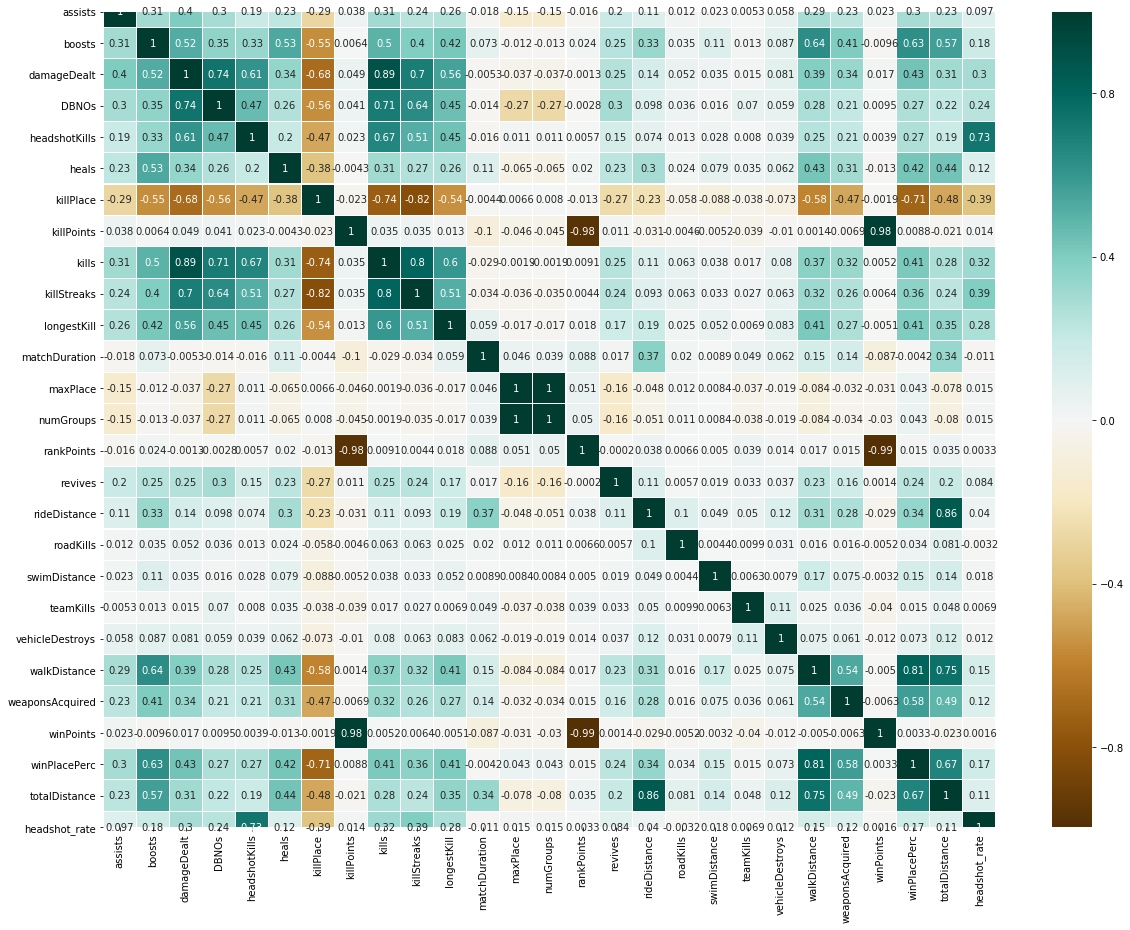

In [29]:
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType']
cols_to_fit = [col for col in train_data.columns if col not in cols_to_drop]
corr = train_data[cols_to_fit].corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    annot=True,
    cmap="BrBG"
)
plt.show()

# Analysing healing with winning percentage

In [30]:
train_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'totalDistance',
       'headshot_rate'],
      dtype='object')

In [31]:
print("The average players uses {:.1f} heal items, 99% of people use {} or less, while the max players used {}.".format(train_data['heals'].mean(), train_data['heals'].quantile(0.99), train_data['heals'].max()))

The average players uses 1.4 heal items, 99% of people use 12.0 or less, while the max players used 40.


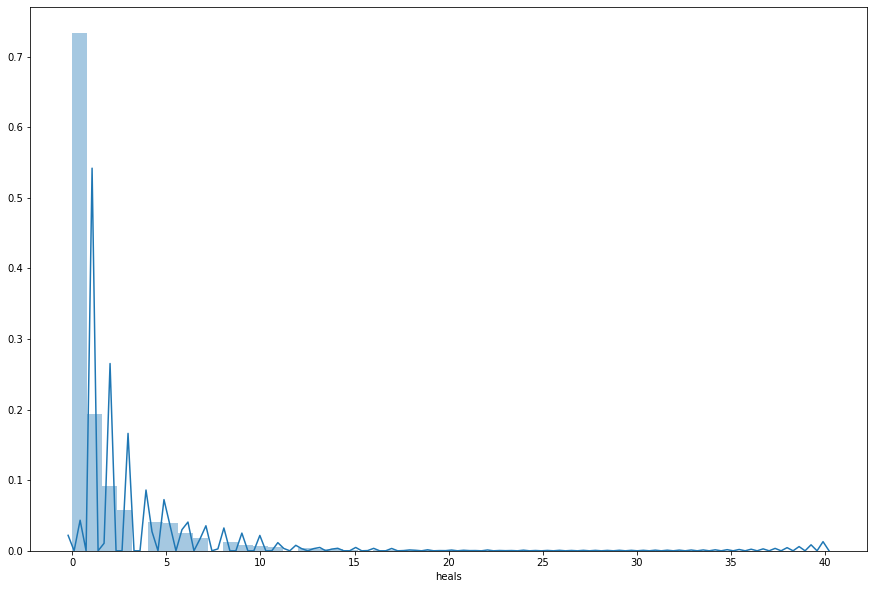

In [32]:
plt.figure(figsize=(15,10))
sns.distplot(a=train_data['heals'])

In [33]:
# Getting heal data under 99 percentile
heal_99Percentile_data = train_data[train_data['heals']<train_data['heals'].quantile(0.99)]

In [34]:
heal_99Percentile_data['heals'].unique()

array([ 0,  5,  2,  1,  8,  3,  4,  6,  9,  7, 10, 11], dtype=int64)

Text(0.5, 1.0, 'Relationship between "heals" and "winning percenatge"')

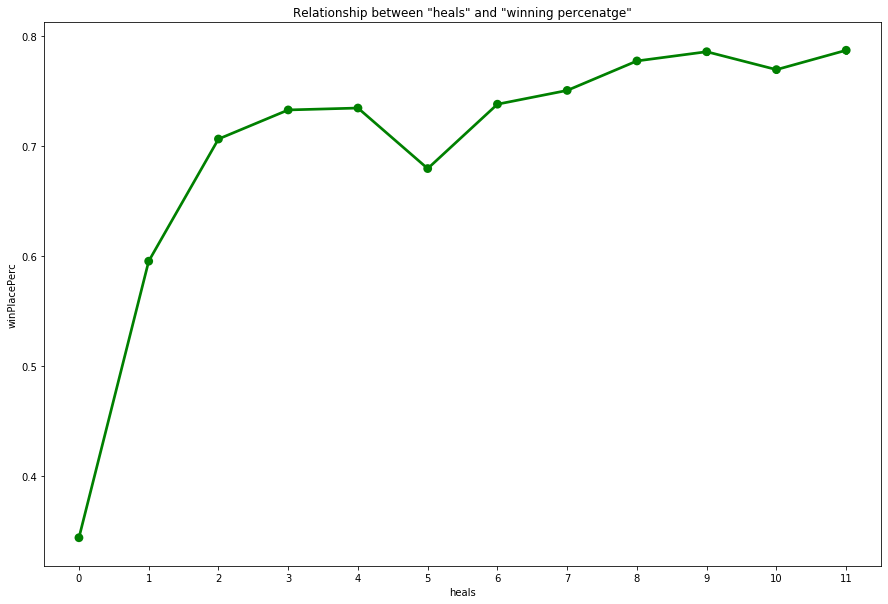

In [35]:
plt.figure(figsize=(15,10))
sns.pointplot(x="heals", y="winPlacePerc", data=heal_99Percentile_data, height=10, ratio=3, color="g")
plt.title('Relationship between "heals" and "winning percenatge"')

### How "Heals" is correlated to "Winning Percentage"

In [36]:
train_data['heals'].corr(train_data['winPlacePerc'])

0.4246423761824971

# Question 1: Does healing improve the chance of winning the game?

Yes, healing does increase the chances of winning of game.

It can be seen from above point plot and correlation between 'heals' and 'winPlacePerc'

# Question 2: What is the effect of Knocking (DBNO), Assisting or Reviving on Winning Percentage?

#### Join plot for each  of the above with 'winPlacePerc'

In [37]:
train_data['DBNOs'].unique()

array([ 0,  1,  6,  4,  3,  2,  5, 10,  8,  7,  9, 13, 21, 12, 11, 19, 32,
       18, 24, 22, 20, 14, 15, 26, 17, 16, 25, 27, 23, 33, 38, 30, 29, 31,
       39, 35, 28, 53], dtype=int64)

In [38]:
train_data['assists'].unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 11, 12, 10, 20, 14, 17,
       15], dtype=int64)

In [39]:
train_data['revives'].unique()

array([ 0,  1,  3,  2,  4,  5,  6,  8,  9,  7, 13, 16, 11, 12, 10, 17, 14,
       19, 15, 18, 20, 28, 23, 39, 32], dtype=int64)

In [40]:
print("The average DBNOs {:.1f}, 99% of DBNOs {} or less, while the max DBNOs {}.".format(train_data['DBNOs'].mean(), train_data['DBNOs'].quantile(0.99), train_data['DBNOs'].max()))
print("The average assists {:.1f}, 99% of assists {} or less, while the max assists {}.".format(train_data['assists'].mean(), train_data['assists'].quantile(0.99), train_data['assists'].max()))
print("The average revives {:.1f}, 99% of revives {} or less, while the max revives {}.".format(train_data['revives'].mean(), train_data['revives'].quantile(0.99), train_data['revives'].max()))

The average DBNOs 0.7, 99% of DBNOs 5.0 or less, while the max DBNOs 53.
The average assists 0.2, 99% of assists 3.0 or less, while the max assists 20.
The average revives 0.2, 99% of revives 2.0 or less, while the max revives 39.


Text(0.5, 1.0, 'Relationship between "DBNOs" and "winning percenatge"')

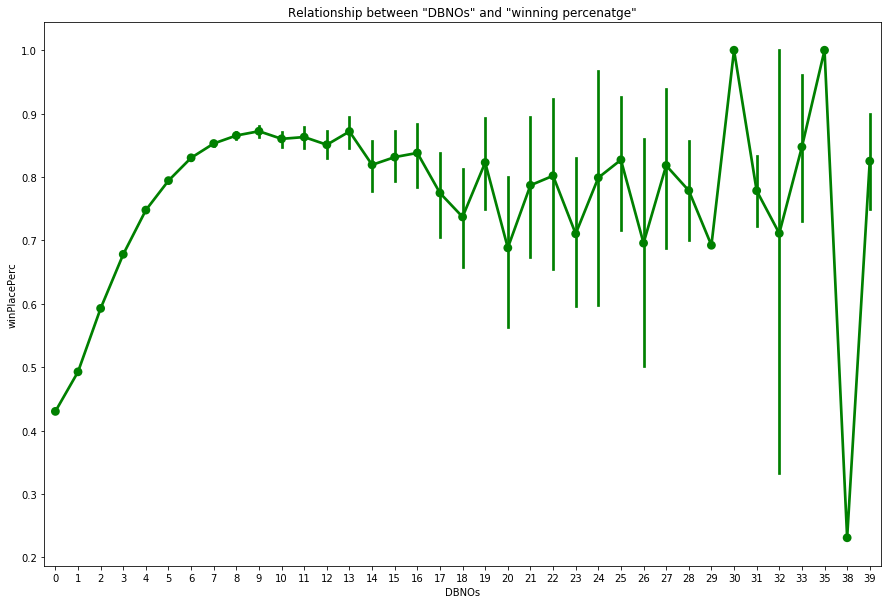

In [41]:
plt.figure(figsize=(15,10))
sns.pointplot(x="DBNOs", y="winPlacePerc", data=heal_99Percentile_data, height=10, ratio=3, color="g")
plt.title('Relationship between "DBNOs" and "winning percenatge"')

Text(0.5, 1.0, 'Relationship between "assists" and "winning percenatge"')

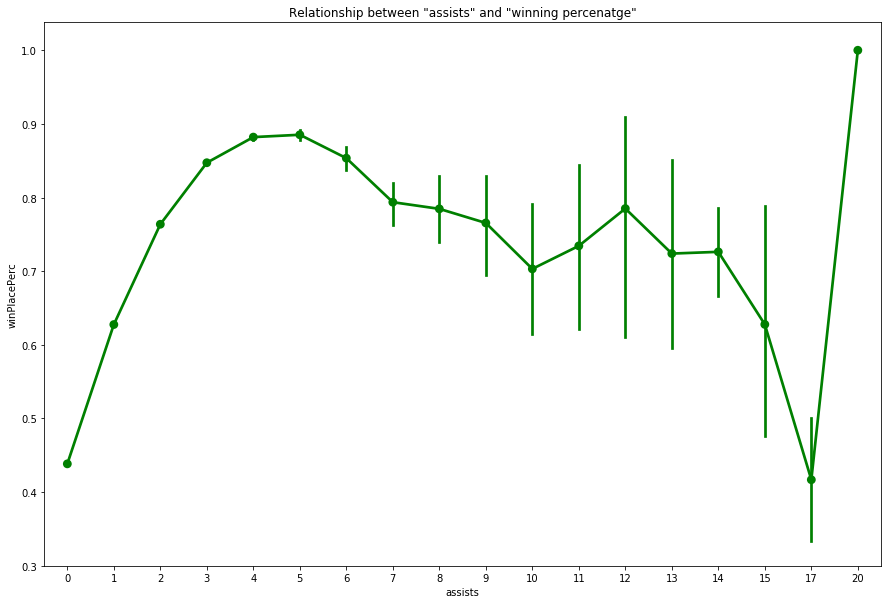

In [42]:
plt.figure(figsize=(15,10))
sns.pointplot(x="assists", y="winPlacePerc", data=heal_99Percentile_data, height=10, ratio=3, color="g")
plt.title('Relationship between "assists" and "winning percenatge"')

Text(0.5, 1.0, 'Relationship between "revives" and "winning percenatge"')

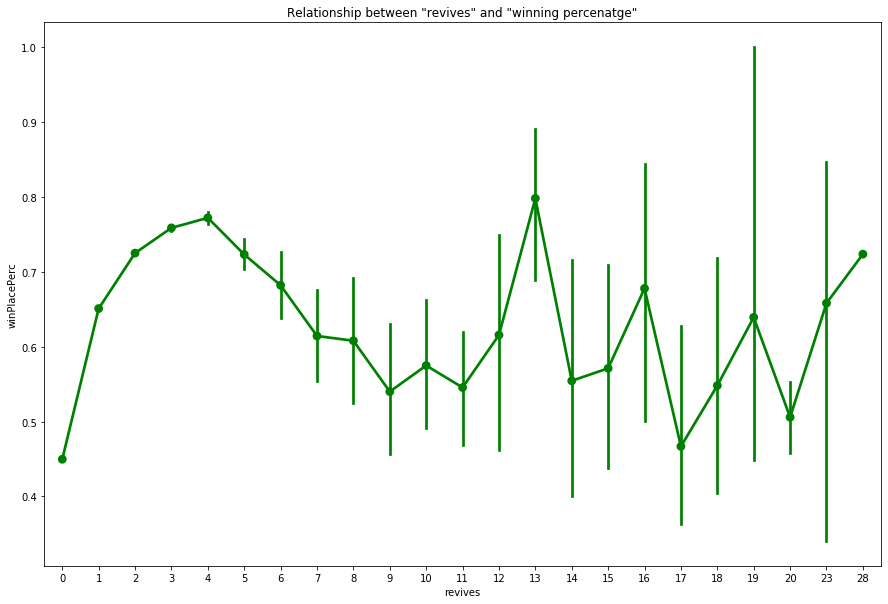

In [43]:
plt.figure(figsize=(15,10))
sns.pointplot(x="revives", y="winPlacePerc", data=heal_99Percentile_data, height=10, ratio=3, color="g")
plt.title('Relationship between "revives" and "winning percenatge"')

Text(0.5, 1, 'Join Plot between "DBNOs" and "winning percenatge"')

<Figure size 1080x720 with 0 Axes>

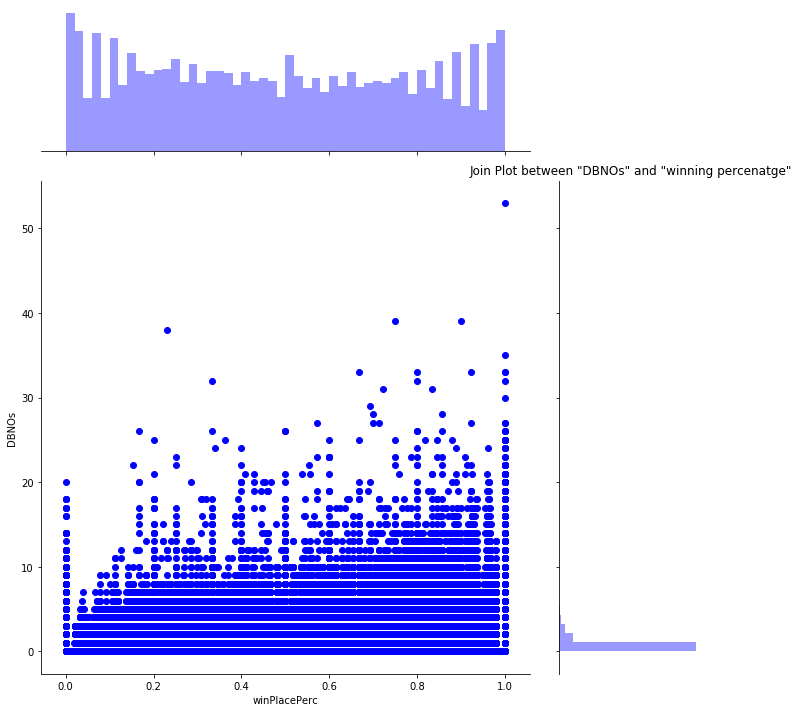

In [44]:
plt.figure(figsize=(15,10))
sns.jointplot(x="winPlacePerc", y="DBNOs", data=train_data, height=10, ratio=3, color="blue")
plt.title('Join Plot between "DBNOs" and "winning percenatge"')

Text(0.5, 1, 'Join Plot between "assists" and "winning percenatge"')

<Figure size 1080x720 with 0 Axes>

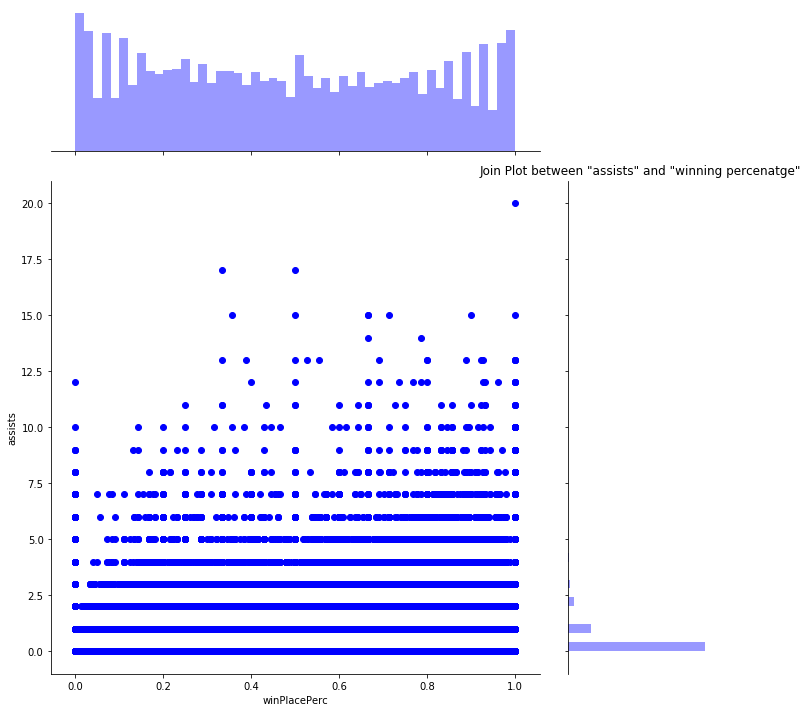

In [45]:
plt.figure(figsize=(15,10))
sns.jointplot(x="winPlacePerc", y="assists", data=train_data, height=10, ratio=3, color="blue")
plt.title('Join Plot between "assists" and "winning percenatge"')

Text(0.5, 1, 'Join Plot between "revives" and "winning percenatge"')

<Figure size 1080x720 with 0 Axes>

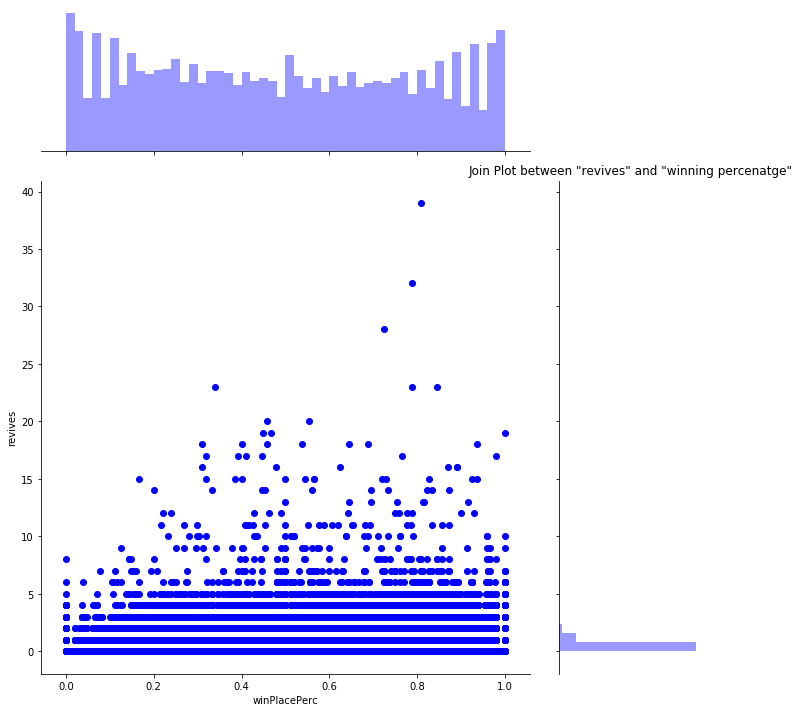

In [46]:
plt.figure(figsize=(15,10))
sns.jointplot(x="winPlacePerc", y="revives", data=train_data, height=10, ratio=3, color="blue")
plt.title('Join Plot between "revives" and "winning percenatge"')

# What is the effect on the MAE if we are not removing any attribute from the data?Was it a good decision?

In [47]:
data = train_data.copy()

In [48]:
# Creating new features in data
data['healthItems'] = data['heals'] + data['boosts']
data['killPlaceOverMaxPlace'] = data['killPlace'] / data['maxPlace']
data['killsOverWalkDistance'] = data['kills'] / data['walkDistance']
data['killsOverDistance'] = data['kills'] / data['totalDistance']
data['walkDistancePerSec'] = data['walkDistance'] / data['matchDuration']

In [49]:
data = data.replace([np.inf, -np.inf], np.nan) #Check if there is any infinity value. If present, then replace it with NaN

In [50]:
data.isnull().sum()

Id                          0
groupId                     0
matchId                     0
assists                     0
boosts                      0
damageDealt                 0
DBNOs                       0
headshotKills               0
heals                       0
killPlace                   0
killPoints                  0
kills                       0
killStreaks                 0
longestKill                 0
matchDuration               0
matchType                   0
maxPlace                    0
numGroups                   0
rankPoints                  0
revives                     0
rideDistance                0
roadKills                   0
swimDistance                0
teamKills                   0
vehicleDestroys             0
walkDistance                0
weaponsAcquired             0
winPoints                   0
winPlacePerc                0
totalDistance               0
headshot_rate               0
healthItems                 0
killPlaceOverMaxPlace       0
killsOverW

In [51]:
data.dropna(axis=0,how='any',inplace=True)

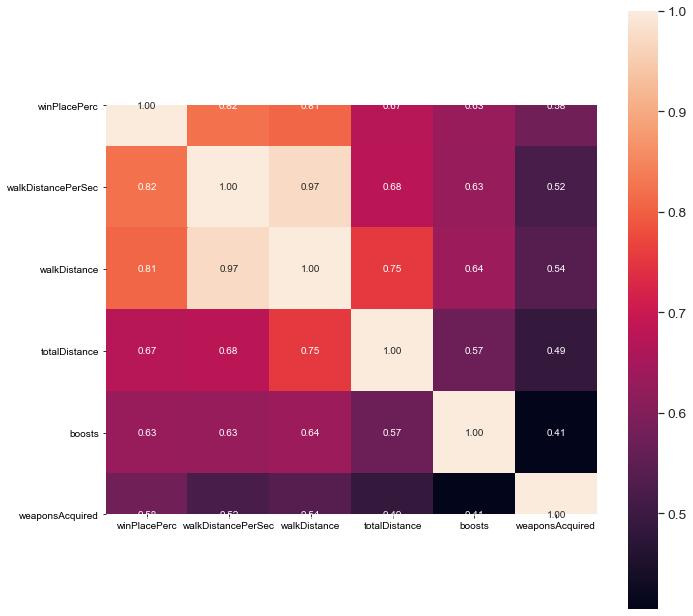

In [52]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = data.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
data['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [54]:
def get_columnTypes(dataFrame):
    numerical_columns = {column_name:'Numerical' for column_name in [key for key in dict(dataFrame.dtypes)
                   if dict(dataFrame.dtypes)[key]
                       in ['float64','float32','int32','int64']] }

    category_columns = {column_name:'Categorical' for column_name in [key for key in dict(dataFrame.dtypes)
                 if dict(dataFrame.dtypes)[key] in ['object'] ] }
    
    category_df = pd.DataFrame.from_dict(data=category_columns,orient='index')
    numerical_df = pd.DataFrame.from_dict(data=numerical_columns,orient='index')
    columnType_dataframe = pd.concat([category_df,numerical_df])
    columnType_dataframe = columnType_dataframe.reset_index()
    columnType_dataframe.columns = ['Column Name','Column Type']
    return columnType_dataframe

In [55]:
get_columnTypes(data)  # Check the column type of each feature. Remove the irrelevant feature like 'Id' and handle the categorical column 

,Column Name,Column Type
0,Id,Categorical
1,groupId,Categorical
2,matchId,Categorical
3,matchType,Categorical
4,assists,Numerical
5,boosts,Numerical
6,damageDealt,Numerical
7,DBNOs,Numerical
8,headshotKills,Numerical
9,heals,Numerical


In [56]:
data.drop(['Id','groupId','matchId'],axis=1,inplace=True)

In [57]:
get_columnTypes(data)

,Column Name,Column Type
0,matchType,Categorical
1,assists,Numerical
2,boosts,Numerical
3,damageDealt,Numerical
4,DBNOs,Numerical
5,headshotKills,Numerical
6,heals,Numerical
7,killPlace,Numerical
8,killPoints,Numerical
9,kills,Numerical


In [58]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error

In [59]:
ohe_enc = OneHotCategoricalEncoder(variables=['matchType'],drop_last=True)
all_numerical_data = ohe_enc.fit_transform(data)

In [60]:
get_columnTypes(all_numerical_data)

,Column Name,Column Type
0,assists,Numerical
1,boosts,Numerical
2,damageDealt,Numerical
3,DBNOs,Numerical
4,headshotKills,Numerical
5,heals,Numerical
6,killPlace,Numerical
7,killPoints,Numerical
8,kills,Numerical
9,killStreaks,Numerical


In [61]:
ohe_enc.encoder_dict_

{'matchType': ['squad-fpp',
  'duo',
  'solo-fpp',
  'squad',
  'duo-fpp',
  'solo',
  'normal-squad-fpp',
  'crashfpp',
  'flaretpp',
  'normal-solo-fpp',
  'flarefpp',
  'normal-duo-fpp',
  'normal-duo',
  'normal-squad',
  'crashtpp']}

In [62]:
features = all_numerical_data.drop('winPlacePerc',axis=1)
target = all_numerical_data['winPlacePerc']

### Split data into training and validation data

In [63]:
X_train,X_val,y_train,y_val = train_test_split(features,target,train_size=0.9,random_state=10)

In [64]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=30, min_samples_leaf=3, max_features='sqrt', n_jobs=1))

In [65]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='sqrt',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=3,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=30, n_jobs=1,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, thresh

In [66]:
sel.get_support()

array([False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [67]:
selected_features= X_train.columns[(sel.get_support())]
print(selected_features)

Index(['boosts', 'heals', 'killPlace', 'walkDistance', 'weaponsAcquired',
       'totalDistance', 'healthItems', 'killPlaceOverMaxPlace',
       'walkDistancePerSec'],
      dtype='object')


In [68]:
regressorModel = RandomForestRegressor(n_estimators=30, min_samples_leaf=3, max_features='sqrt', n_jobs=1)
regressorModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [69]:
featureImportance_dataframe = pd.DataFrame({'cols':X_train.columns, 'imp':regressorModel.feature_importances_}).sort_values('imp', ascending=False)

Text(0.5, 1.0, 'Feature Importance of columns')

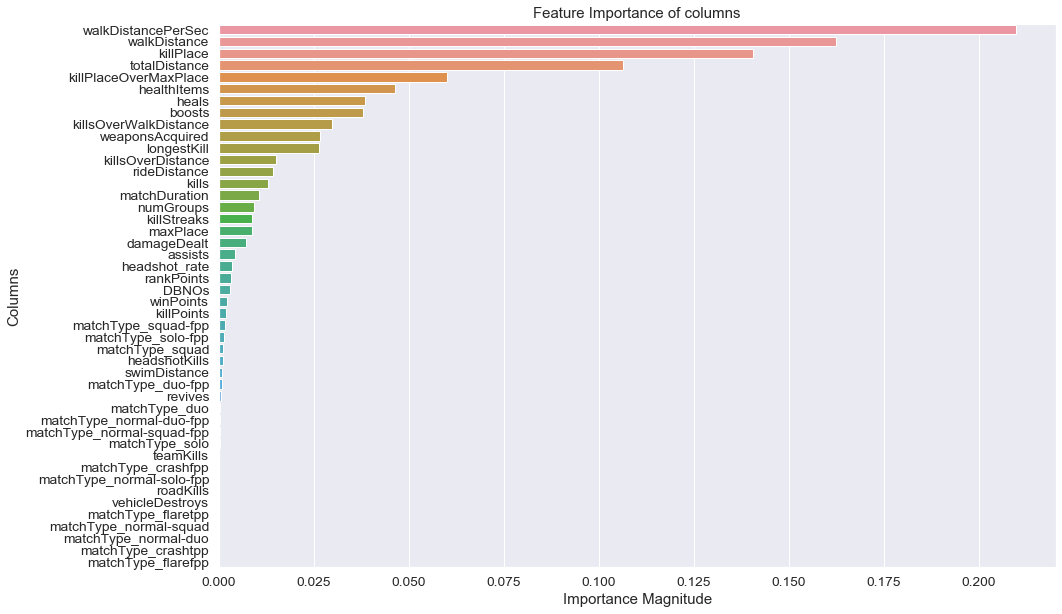

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x=featureImportance_dataframe['imp'], y=featureImportance_dataframe['cols'], data=featureImportance_dataframe)
plt.xlabel('Importance Magnitude')
plt.ylabel('Columns')
plt.title('Feature Importance of columns')

In [71]:
print("Mean Absolute Error of train data:{} and validation data:{}".format(mean_absolute_error(regressorModel.predict(X_train), y_train), mean_absolute_error(regressorModel.predict(X_val), y_val)))

Mean Absolute Error of train data:0.03995595806668388 and validation data:0.05984117189115976


In [72]:
X_train_best_features = X_train[[column for column in selected_features]]
X_val_best_features = X_val[[column for column in selected_features]]

In [73]:
regressorModel_withBestFeatures = RandomForestRegressor(n_estimators=30, min_samples_leaf=3, max_features='sqrt', n_jobs=1)
regressorModel_withBestFeatures.fit(X_train_best_features, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [74]:
print("Mean Absolute Error of train data:{} and validation data:{} with top {} features in consideration".format(mean_absolute_error(regressorModel_withBestFeatures.predict(X_train_best_features), y_train), mean_absolute_error(regressorModel_withBestFeatures.predict(X_val_best_features), y_val),X_train_best_features.shape[1]))

Mean Absolute Error of train data:0.04458597725821885 and validation data:0.06844065371990388 with top 9 features in consideration


## Feature Engineering to create more features and check  the  correlation with  target variable

In [75]:
all_numerical_data['playersJoined'] = clean_data.groupby('matchId')['matchId'].transform('count')
all_numerical_data['killsNorm'] = all_numerical_data['kills']*((100-all_numerical_data['playersJoined'])/100 + 1)
all_numerical_data['damageDealtNorm'] = all_numerical_data['damageDealt']*((100-all_numerical_data['playersJoined'])/100 + 1)
all_numerical_data['killsWithoutMoving'] = ((all_numerical_data['kills'] > 0) & (all_numerical_data['totalDistance'] == 0))
all_numerical_data['killPlacePerc'] = all_numerical_data['killPlace'].rank(pct=True).values
all_numerical_data['killsPerc'] = all_numerical_data['kills'].rank(pct=True).values
all_numerical_data['walkDistancePerc'] = all_numerical_data['walkDistance'].rank(pct=True).values
all_numerical_data['walkPerc_killsPerc'] = all_numerical_data['walkDistancePerc'] / all_numerical_data['killsPerc']
all_numerical_data['killPlaceOverMaxPlace'] = all_numerical_data['killPlace'] / all_numerical_data['maxPlace']
all_numerical_data['killsPerc'] = all_numerical_data['kills'].rank(pct=True).values
all_numerical_data['walkDistancePerc'] = all_numerical_data['walkDistance'].rank(pct=True).values
all_numerical_data['walkDistancePerSec'] = all_numerical_data['walkDistance'] / all_numerical_data['matchDuration']

In [78]:
features_correlation_with_Winning = {}
for column in [column for column in all_numerical_data.columns if column!='winPlacePerc']:
    features_correlation_with_Winning[column] = all_numerical_data[column].corr(all_numerical_data['winPlacePerc'])

In [79]:
features_correlation_with_Winning

{'assists': 0.29568082134744156,
 'boosts': 0.632466404539396,
 'damageDealt': 0.43227681722181593,
 'DBNOs': 0.26978694461689795,
 'headshotKills': 0.27376742671826604,
 'heals': 0.4245804538695397,
 'killPlace': -0.7114205341368456,
 'killPoints': 0.008756410475028694,
 'kills': 0.4144044635864331,
 'killStreaks': 0.36480350187073884,
 'longestKill': 0.40735506930336196,
 'matchDuration': -0.003984031146101505,
 'maxPlace': 0.04296161628126733,
 'numGroups': 0.043347337731361194,
 'rankPoints': 0.015277770116651945,
 'revives': 0.23602041143806557,
 'rideDistance': 0.339298283169289,
 'roadKills': 0.03434102617839047,
 'swimDistance': 0.1500225730239618,
 'teamKills': 0.015414183779056855,
 'vehicleDestroys': 0.07253817919910316,
 'walkDistance': 0.8087753070585036,
 'weaponsAcquired': 0.5750647590401669,
 'winPoints': 0.0032522545925442407,
 'totalDistance': 0.6732148133650601,
 'headshot_rate': 0.172964961503781,
 'healthItems': 0.573468507757909,
 'killPlaceOverMaxPlace': -0.59190

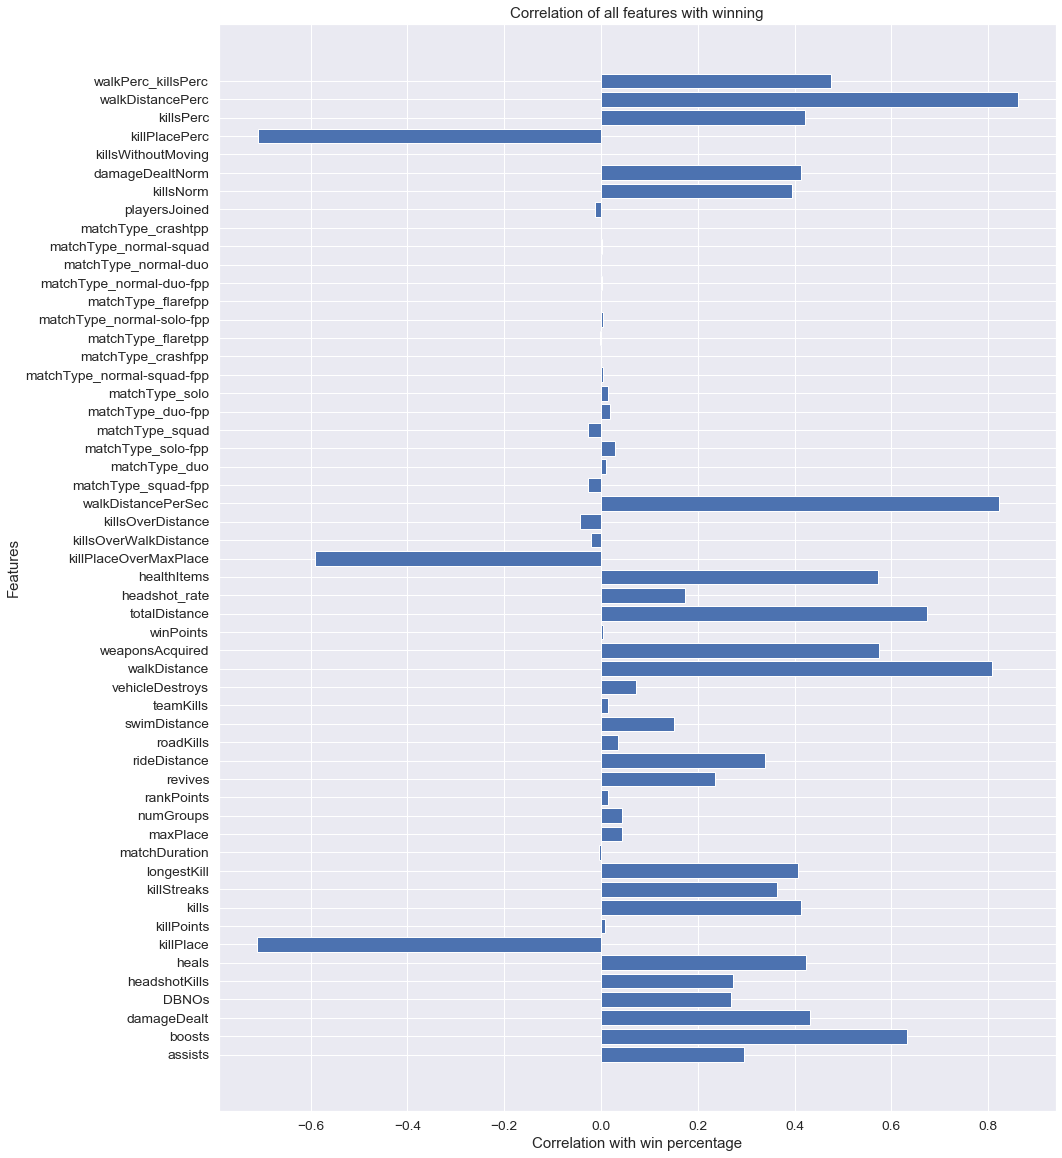

In [205]:
plt.figure(figsize=(15,20))
plt.barh(range(len(features_correlation_with_Winning)), features_correlation_with_Winning.values(), align='center')
plt.yticks(range(len(features_correlation_with_Winning)), list(features_correlation_with_Winning.keys()))
plt.xlabel('Correlation with win percentage')
plt.ylabel('Features')
plt.title("Correlation of all features with winning")
plt.show()

In [121]:
highly_correlated_columns = []
for column,correlation in features_correlation_with_Winning.items():
    if abs(correlation)>0.4:
        highly_correlated_columns.append(column)

In [129]:
print('Highly Correlated columns with winning are:\n{}'.format(highly_correlated_columns))

Highly Correlated columns with winning are:
['boosts', 'damageDealt', 'heals', 'killPlace', 'kills', 'longestKill', 'walkDistance', 'weaponsAcquired', 'totalDistance', 'healthItems', 'killPlaceOverMaxPlace', 'walkDistancePerSec', 'damageDealtNorm', 'killPlacePerc', 'killsPerc', 'walkDistancePerc', 'walkPerc_killsPerc']


In [135]:
features = all_numerical_data.drop('winPlacePerc',axis=1)[highly_correlated_columns]
target = all_numerical_data['winPlacePerc']

In [136]:
X_train,X_val,y_train,y_val = train_test_split(features,target,train_size=0.9,random_state=10)

In [141]:
regressorModel_with_highly_correlated_columns = RandomForestRegressor(n_estimators=30, min_samples_leaf=3, max_features='sqrt', n_jobs=1)
regressorModel_with_highly_correlated_columns.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [145]:
print("Mean Absolute Error of train data:{} and validation data:{}".format(mean_absolute_error(regressorModel_with_highly_correlated_columns.predict(X_train), y_train), mean_absolute_error(regressorModel_with_highly_correlated_columns.predict(X_val), y_val)))

Mean Absolute Error of train data:0.03863770646208728 and validation data:0.062052229361564855


### Preparing the Test Data for model

In [113]:
raw_test_data = test_data.copy()

In [149]:
raw_test_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')

In [150]:
raw_test_data['totalDistance'] = raw_test_data['rideDistance'] + raw_test_data['walkDistance'] + raw_test_data['swimDistance']
raw_test_data['headshot_rate'] = raw_test_data['headshotKills']/raw_test_data['kills']
raw_test_data['headshot_rate'] = raw_test_data['headshot_rate'].fillna(0)
# Removing Players who made more than 10 kills and all the kills were done by headshot
raw_test_data.drop(raw_test_data[(raw_test_data['headshot_rate'] == 1) & (raw_test_data['kills'] >= 10)].index,inplace=True)
# Removing Players who has more that 40 kills, picking more 55 weapons and covered distance lesser than 100 meters
raw_test_data.drop(raw_test_data[(raw_test_data['kills'] >= 40) & (raw_test_data['weaponsAcquired'] > 55) & (raw_test_data['totalDistance'] < 100.0)].index,inplace=True)
# Removing Players who has more than 40 kills without using any heals
raw_test_data.drop(raw_test_data[(raw_test_data['kills'] >= 40) & (raw_test_data['heals'] == 0)].index,inplace=True)
# Removing Players who has kills without using any moving
raw_test_data.drop(raw_test_data[(raw_test_data['kills'] > 0) & (raw_test_data['totalDistance'] == 0)].index,inplace=True)
# Removing Players who has kills from distance 1000 m 
raw_test_data.drop(raw_test_data[(raw_test_data['kills'] > 0) & (raw_test_data['longestKill'] >= 1000)].index,inplace=True)
# Removing Players who got more than 10 roadKills
raw_test_data.drop(raw_test_data[raw_test_data['roadKills'] > 10].index,inplace=True)

# Removing players who roam by walking around without any kill
raw_test_data.drop(raw_test_data[(raw_test_data['walkDistance'] >= 13000) & (raw_test_data['kills'] == 0)].index,inplace=True)
# Removing players who raom around by riding without any kill
raw_test_data.drop(raw_test_data[(raw_test_data['rideDistance'] >= 30000) & (raw_test_data['kills'] == 0)].index,inplace=True)
# Removing players who is able to ride and kill without walking even a single meter
raw_test_data.drop(raw_test_data[(raw_test_data['kills'] >= 0) & (raw_test_data['rideDistance'] > 0) & (raw_test_data['walkDistance'] == 0)].index,inplace=True)
# Removing players whose total distance is 0
raw_test_data.drop(raw_test_data[(raw_test_data['totalDistance'] == 0)].index,inplace=True)
# Removing players who swim for more than 2 km without breathing
raw_test_data.drop(raw_test_data[raw_test_data['swimDistance'] >= 2000].index,inplace=True)

raw_test_data.drop(raw_test_data[raw_test_data['heals']>40].index,inplace=True)
raw_test_data.drop(raw_test_data[raw_test_data['weaponsAcquired']>80].index,inplace=True)

raw_test_data['healthItems'] = raw_test_data['heals'] + raw_test_data['boosts']
raw_test_data['killPlaceOverMaxPlace'] = raw_test_data['killPlace'] / raw_test_data['maxPlace']
raw_test_data['killsOverWalkDistance'] = raw_test_data['kills'] / raw_test_data['walkDistance']
raw_test_data['killsOverDistance'] = raw_test_data['kills'] / raw_test_data['totalDistance']
raw_test_data['walkDistancePerSec'] = raw_test_data['walkDistance'] / raw_test_data['matchDuration']

raw_test_data['playersJoined'] = clean_data.groupby('matchId')['matchId'].transform('count')
raw_test_data['killsNorm'] = raw_test_data['kills']*((100-raw_test_data['playersJoined'])/100 + 1)
raw_test_data['damageDealtNorm'] = raw_test_data['damageDealt']*((100-raw_test_data['playersJoined'])/100 + 1)
raw_test_data['killsWithoutMoving'] = ((raw_test_data['kills'] > 0) & (raw_test_data['totalDistance'] == 0))
raw_test_data['killPlacePerc'] = raw_test_data['killPlace'].rank(pct=True).values
raw_test_data['killsPerc'] = raw_test_data['kills'].rank(pct=True).values
raw_test_data['walkDistancePerc'] = raw_test_data['walkDistance'].rank(pct=True).values
raw_test_data['walkPerc_killsPerc'] = raw_test_data['walkDistancePerc'] / raw_test_data['killsPerc']
raw_test_data['killPlaceOverMaxPlace'] = raw_test_data['killPlace'] / raw_test_data['maxPlace']
raw_test_data['killsPerc'] = raw_test_data['kills'].rank(pct=True).values
raw_test_data['walkDistancePerc'] = raw_test_data['walkDistance'].rank(pct=True).values
raw_test_data['walkDistancePerSec'] = raw_test_data['walkDistance'] / raw_test_data['matchDuration']

raw_test_data.drop(['Id','groupId','matchId'],axis=1,inplace=True)
ohe_enc = OneHotCategoricalEncoder(variables=['matchType'],drop_last=True)
raw_test_data = ohe_enc.fit_transform(raw_test_data)

In [155]:
raw_test_data = raw_test_data.replace([np.inf, -np.inf], np.nan)

In [157]:
raw_test_data.isnull().sum()

assists                           0
boosts                            0
damageDealt                       0
DBNOs                             0
headshotKills                     0
heals                             0
killPlace                         0
killPoints                        0
kills                             0
killStreaks                       0
longestKill                       0
matchDuration                     0
maxPlace                          0
numGroups                         0
rankPoints                        0
revives                           0
rideDistance                      0
roadKills                         0
swimDistance                      0
teamKills                         0
vehicleDestroys                   0
walkDistance                      0
weaponsAcquired                   0
winPoints                         0
totalDistance                     0
headshot_rate                     0
healthItems                       0
killPlaceOverMaxPlace       

In [158]:
raw_test_data.dropna(axis=0,how='any',inplace=True)

In [159]:
clean_test_data = raw_test_data.copy()

In [160]:
X_test = clean_test_data[highly_correlated_columns]

# Prediction

In [161]:
y_pred = regressorModel_with_highly_correlated_columns.predict(X_test)

# Can we improve the accuracy of the model? If yes How

#### Using boosting technique for possibly increasing the accuracy of the model

In [183]:
import xgboost
from xgboost import plot_importance
from collections import OrderedDict

In [184]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [185]:
#features = all_numerical_data.drop('winPlacePerc',axis=1)[highly_correlated_columns]
features = all_numerical_data.drop('winPlacePerc',axis=1)
target = all_numerical_data['winPlacePerc']

In [186]:
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=10)

In [187]:
model.fit(X_train,y_train)

F:\Anaconda_Version_2019\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [188]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('killPlace', 828),
             ('killPlacePerc', 479),
             ('playersJoined', 478),
             ('killPlaceOverMaxPlace', 430),
             ('killsNorm', 343),
             ('walkDistancePerSec', 313),
             ('killsOverDistance', 309),
             ('kills', 285),
             ('numGroups', 279),
             ('matchDuration', 276),
             ('walkDistance', 262),
             ('totalDistance', 224),
             ('walkPerc_killsPerc', 220),
             ('killsOverWalkDistance', 209),
             ('walkDistancePerc', 188),
             ('maxPlace', 152),
             ('boosts', 143),
             ('weaponsAcquired', 131),
             ('killsPerc', 101),
             ('longestKill', 96),
             ('damageDealt', 95),
             ('DBNOs', 91),
             ('winPoints', 88),
             ('killStreaks', 87),
             ('rideDistance', 86),
             ('damageDealtNorm', 72),
             ('assists', 62),
             ('swimDistance', 57),

In [193]:
feature_fscore = dict(OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True)))

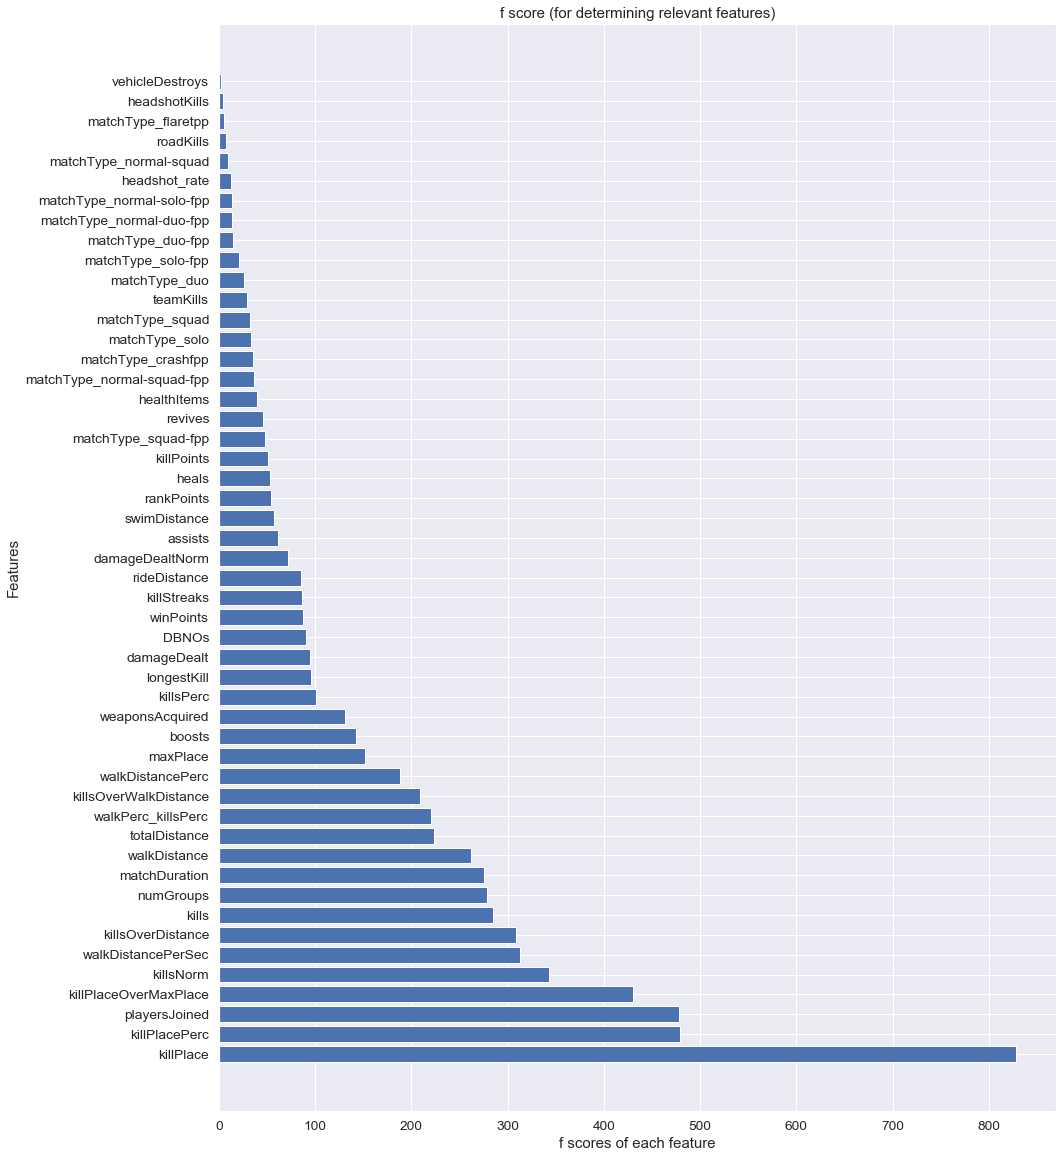

In [206]:
plt.figure(figsize=(15,20))
plt.barh(range(len(feature_fscore)), feature_fscore.values(), align='center')
plt.yticks(range(len(feature_fscore)), list(feature_fscore.keys()))
plt.xlabel('f scores of each feature')
plt.ylabel('Features')
plt.title("f score (for determining relevant features)")
plt.show()

In [195]:
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 250).keys())
print(most_relevant_features)

['killPlace', 'killsNorm', 'walkDistance', 'walkDistancePerSec', 'killPlaceOverMaxPlace', 'killPlacePerc', 'killsOverDistance', 'numGroups', 'matchDuration', 'kills', 'playersJoined']


In [196]:
feature_importances = model.feature_importances_

#### Selecting only relevant features from X_train, X_test for regression using XGBoost

In [198]:
X_train_relevant_features = X_train[most_relevant_features]
X_test_relevant_features = X_test[most_relevant_features]

In [199]:
boost_model_best = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [200]:
boost_model_best.fit(X_train_relevant_features,y_train)

[02:43:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [201]:
y_pred_WITHOUT_best_features_XGBoost = model.predict(X_test)
y_pred_WITH_best_features_XGBoost = boost_model_best.predict(X_test_relevant_features)

In [203]:
print("Mean Absolute Error of test data without relevant best feature using XGBoost: {}".format(mean_absolute_error(y_test,y_pred_WITHOUT_best_features_XGBoost)))
print("Mean Absolute Error of test data with relevant best feature using XGBoost: {}".format(mean_absolute_error(y_test,y_pred_WITH_best_features_XGBoost)))

Mean Absolute Error of test data without relevant best feature using XGBoost: 0.05733571387333156
Mean Absolute Error of test data with relevant best feature using XGBoost: 0.059219044794106744


### MAE is better with Boosting techniques. While MAE on test data with Random Forest was 0.06844 (after selecting best features), MAE with XGBoost is 0.05921 (after selecting best feature)